In [1]:
# Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Get raw 2.1.1 data
%store -r data_frame_2_1_1_preexclusions
data_frame = data_frame_2_1_1_preexclusions

In [4]:
# Clarify dataframe
study_test_df = data_frame.query('block_number > 0 and trial_period == trial_period')
test_df = study_test_df.query('trial_period == "test"')
test_df['correct'] = test_df['correct_side'] == test_df['chosen_side']
test_df['more_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].min(axis=1)
test_df['less_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].max(axis=1)
df = test_df

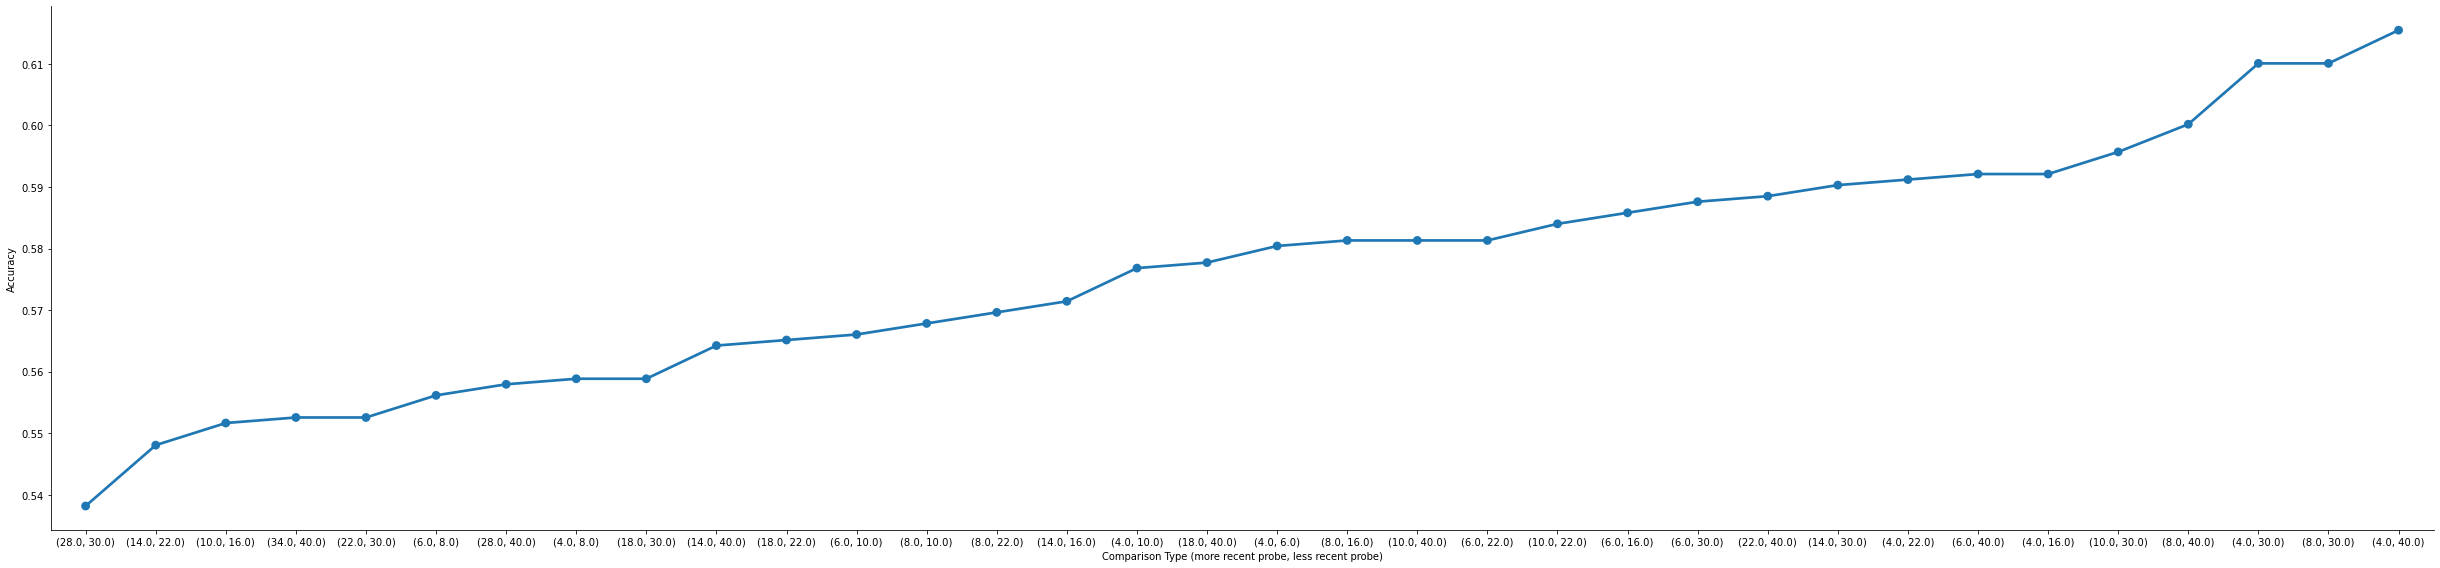

In [31]:
# Get comparisons and overall accuracies in comparable form
# sort values: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
correct_by_comparison = df.groupby(['more_recent_probe', 'less_recent_probe']).agg({'correct': 'mean'}).reset_index()
correct_by_comparison['comparison'] = '(' + correct_by_comparison['more_recent_probe'].astype(str) + ', ' + correct_by_comparison['less_recent_probe'].astype(str) + ')'
correct_by_comparison = correct_by_comparison.sort_values(by=['correct'])

# Graph
fig = sns.catplot(x='comparison', y='correct', data=correct_by_comparison, kind='point', height=8, aspect=34/8)
fig.set(xlabel='Comparison Type (more recent probe, less recent probe)', ylabel='Accuracy')

In [38]:
correct_by_comparison['comparison'].to_numpy()

array(['(28.0, 30.0)', '(14.0, 22.0)', '(10.0, 16.0)', '(34.0, 40.0)',
       '(22.0, 30.0)', '(6.0, 8.0)', '(28.0, 40.0)', '(4.0, 8.0)',
       '(18.0, 30.0)', '(14.0, 40.0)', '(18.0, 22.0)', '(6.0, 10.0)',
       '(8.0, 10.0)', '(8.0, 22.0)', '(14.0, 16.0)', '(4.0, 10.0)',
       '(18.0, 40.0)', '(4.0, 6.0)', '(8.0, 16.0)', '(10.0, 40.0)',
       '(6.0, 22.0)', '(10.0, 22.0)', '(6.0, 16.0)', '(6.0, 30.0)',
       '(22.0, 40.0)', '(14.0, 30.0)', '(4.0, 22.0)', '(6.0, 40.0)',
       '(4.0, 16.0)', '(10.0, 30.0)', '(8.0, 40.0)', '(4.0, 30.0)',
       '(8.0, 30.0)', '(4.0, 40.0)'], dtype=object)

In [65]:
# Get amount correct by subject and comparison type
correct_by_subj_and_comparison = df
correct_by_subj_and_comparison['comparison'] = '(' + correct_by_subj_and_comparison['more_recent_probe'].astype(str) + ', ' + correct_by_subj_and_comparison['less_recent_probe'].astype(str) + ')'
correct_by_subj_and_comparison = correct_by_subj_and_comparison.groupby(['uniqueid', 'comparison']).agg({'correct': 'sum'}).reset_index()

# correct_by_subj_and_comparison['performance_difference'] = correct_by_subj_and_comparison.groupby('uniqueid').apply(lambda x: 
# correct_by_subj_and_comparison['newcolumn'] = df.groupby('uniqueid').apply(lambda x: fxy(x['A'], x['B']), axis=1)

# correct_by_subj_and_comparison = df.groupby('uniqueid').agg({'correct': 'mean'}).reset_index()
# correct_by_subj_and_comparison

,uniqueid,comparison,correct
0,A102WSFN62OS6I:3BWI6RSP7HGHP50Q24JSWZW2591E74,"(10.0, 16.0)",2
1,A102WSFN62OS6I:3BWI6RSP7HGHP50Q24JSWZW2591E74,"(10.0, 22.0)",2
2,A102WSFN62OS6I:3BWI6RSP7HGHP50Q24JSWZW2591E74,"(10.0, 30.0)",1
3,A102WSFN62OS6I:3BWI6RSP7HGHP50Q24JSWZW2591E74,"(10.0, 40.0)",3
4,A102WSFN62OS6I:3BWI6RSP7HGHP50Q24JSWZW2591E74,"(14.0, 16.0)",0
...,...,...,...
12609,AZXNPVVLWKK1V:3RRCEFRB7NJMZF6NQFJVSF67B29B4C,"(8.0, 10.0)",1
12610,AZXNPVVLWKK1V:3RRCEFRB7NJMZF6NQFJVSF67B29B4C,"(8.0, 16.0)",2
12611,AZXNPVVLWKK1V:3RRCEFRB7NJMZF6NQFJVSF67B29B4C,"(8.0, 22.0)",2
12612,AZXNPVVLWKK1V:3RRCEFRB7NJMZF6NQFJVSF67B29B4C,"(8.0, 30.0)",0


In [71]:

performance_differences = []
for i in correct_by_subj_and_comparison['uniqueid'].unique():
    subj_df = correct_by_subj_and_comparison[correct_by_subj_and_comparison['uniqueid'] == i].sort_values(by
    print(subj_df[subj_df['comparison'] == '(4.0, 40.0)']['correct'].iloc[0] - subj_df[subj_df['comparison'] == '(28.0, 30.0)']['correct'].iloc[0])

performance_differences

-1
1
0
1
0
0
1
0
0
0
1
0
3
-1
1
1
-1
0
0
-1
0
0
0
0
-1
1
1
0
1
0
0
1
0
1
-2
0
2
-1
2
-1
2
-1
0
1
1
-1
-1
0
-2
-1
0
0
1
1
1
1
1
0
-1
1
0
-1
2
-1
1
0
2
0
-2
2
1
-3
0
-1
1
1
-1
-1
1
1
2
3
0
3
1
-1
2
2
0
-2
0
1
0
-1
-1
1
-1
1
1
0
0
0
1
0
0
0
1
1
1
0
-1
2
-2
-1
0
2
1
1
0
1
1
-2
-2
0
0
1
0
0
-1
-2
2
0
2
0
-1
-2
0
2
1
0
1
-1
1
0
2
1
-1
0
-2
-1
1
-1
1
1
0
0
2
1
0
-3
-1
0
0
2
-3
-2
1
0
-1
1
-1
2
-2
1
0
1
0
-1
-2
2
-1
2
0
-2
1
-1
-1
-2
1
0
-1
1
1
1
-1
1
-1
1
0
1
0
-2
0
0
0
-1
-1
0
1
2
2
-1
0
2
3
2
1
0
-1
1
0
-2
-1
-1
3
1
-1
0
0
0
2
0
-1
1
-3
-1
0
0
-1
0
0
-1
0
1
0
0
3
2
0
2
2
-1
3
0
0
2
0
0
1
1
1
0
1
0
1
2
0
1
0
-2
3
2
1
0
0
0
-1
0
0
-3
-1
1
0
2
2
2
0
0
-3
0
2
-2
0
0
0
0
2
1
1
2
-2
0
-1
2
2
0
1
0
-2
2
1
2
1
-1
1
1
-1
-3
2
2
1
0
0
-2
2
2
1
0
0
-1
3
2
0
1
1
-2
0
-1
0
0
0
2
-1
-1
0
1
0
0
0
1
2
-1
0
0
0
0
1
3
0
-1
1
1
0
-2
0
1
0
0
1
0
0


[]